# <font color='blue'>**Bootstrap**</font> 

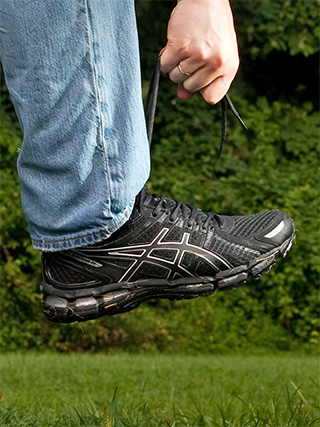

Разберём простенький пример применения бутстрепа

# <font color='green'>0. Импорт необходимых модулей</font>  

In [1]:
#from scipy.stats import bootstrap

Если какой-то из моделей не импортируется, следует его обновить

In [2]:
!pip install -U scipy

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

Создаём RNG для генерации случайных значений

In [4]:
rng = np.random.default_rng()

# <font color='green'>1. Создаём выборку из нормального распределения </font>  

###  <font color='blue'>1.1 Статистика и доверительный интервал </font>  

Берём 100 элементов из $\mathcal{N}(2, 4)$

In [5]:
from scipy.stats import norm
mu, sigma2 = 2, 4
dist = norm(loc=mu, scale=sigma2)  # our "unknown" distribution
n = 500
data = dist.rvs(size=n, random_state=rng)

В качестве статистики возьмём <font color='red'> среднее значение. </font>  

In [6]:
hat_theta = np.mean(data)
print(f"Статистика: {hat_theta:.4f}")

Статистика: 2.2552


По ЦПТ  дисперсия среднего $\approx$ $\frac{\text{выборочная дисперсии}}{\sqrt{n}}$:
$${\displaystyle {\sqrt {n}}\left({\bar {X}}_{n}-\mu \right)\ \xrightarrow {d} \ {\mathcal {N}}\left(0,\sigma ^{2}\right)}$$



Вычисляем квантиль $z_{0.025}$ стандартного нормального распределения

In [7]:
std_norm = stats.norm(loc=0, scale=1)
alpha = 0.05
z = std_norm.ppf(alpha/2)
print(f'0.025-Квантиль: {z}')

0.025-Квантиль: -1.9599639845400545


Вычисляем доверительный интервал



In [8]:
se = np.std(data)
n = len(data)
ci_l, ci_u = hat_theta + z * se / np.sqrt(n), hat_theta - z * se / np.sqrt(n)
print(f"Доверительный интервал: ({ci_l:.4f}, {ci_u:.4f})") 

Доверительный интервал: (1.9053, 2.6050)


###  <font color='blue'>1.2 Визуализация </font>

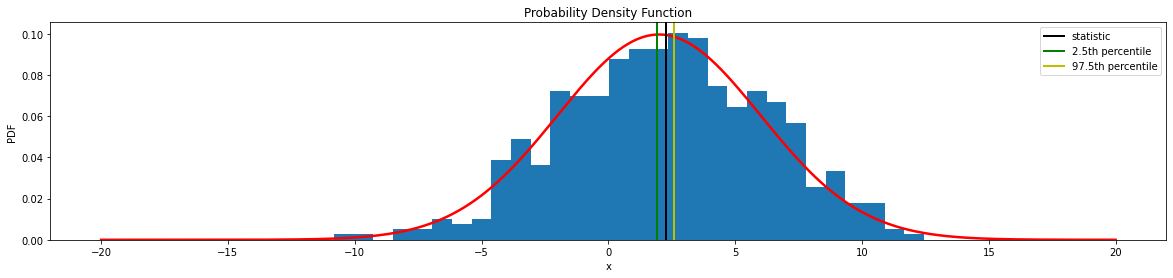

In [16]:
plt.figure(figsize=(20,4))

# Plot the PDF for data
plt.hist(data,bins=30, density=True) #density=True to norm output

#x-axis ranges from -20 to 20 with .001 steps
x = np.arange(-20, 20, 0.001)
#plot Normal distribution 
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma2), c='r',linewidth=2.5)


plt.axvline(x=hat_theta, ymin=0, ymax=1,label='statistic',c='black', linewidth=2.0)

# Showing percentiles
plt.axvline(x=ci_l, ymin=0, ymax=1,label='2.5th percentile',c='g', linewidth=2.0)
plt.axvline(x=ci_u, ymin=0, ymax=1,label='97.5th percentile',c='y', linewidth=2.0)

plt.xlabel("x")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.legend()
plt.show()

# 2. Три способа построить доверительные интервалы 



*  <font color='blue'> Нормальный интервал</font>  $$\left(\hat{\theta}_n + z_{\alpha/2} \, \hat{\operatorname{se}}_{\operatorname{boot}}, \quad \hat{\theta}_n - z_{\alpha/2} \, \hat{\operatorname{se}}_{\operatorname{boot}}\right)$$

*   <font color='blue'>  Центральный интервал</font> $$\left( 2 \hat{\theta}_n - \hat{\theta}^*_{1 - \frac{\alpha}{2}}, \quad 2 \hat{\theta}_n - \hat{\theta}^*_{\frac{\alpha}{2}} \right).$$

*  <font color='blue'> Интервал на основе процентилей </font>  $$\left(\hat{\theta}^*_{\frac{\alpha}{2}}, \quad \hat{\theta}^*_{1 - \frac{\alpha}{2}}\right).$$

###  <font color='red'> 2.1 Сложный способ </font>   - честно создаём бутстрепную выборку

Функция, которая создаёт бутсрепную выборку размера size и возращает для неё статистику func

In [10]:
def draw_bs_stats(data,func,size):    
    bs_stats = []        
    for i in range(size):        
        bs_sample = np.random.choice(data,size=len(data))        
        bs_stats.append(func(bs_sample))    
    return bs_stats

In [11]:
bs_stats = draw_bs_stats(data, np.mean, size=10000)
print(bs_stats[:5])

[2.218131414893904, 2.036233484450577, 2.3955760876267105, 2.023552292772296, 2.4311411788326494]


Строим интервал на основе процентилей </font>  $$\left(\hat{\theta}^*_{\frac{\alpha}{2}}, \quad \hat{\theta}^*_{1 - \frac{\alpha}{2}}\right).$$

In [12]:
# Get the corresponding values of 2.5th and 97.5th percentiles
conf_interval = np.percentile(bs_stats,[2.5,97.5])

# Print the interval
print("The confidence interval: ",conf_interval)

The confidence interval:  [1.90350058 2.60163616]


### 2.2 <font color='red'> Простой способ </font>  - используем scipy
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html

In [13]:
from scipy.stats import bootstrap

In [15]:
data = (data,)  # samples must be in a sequence
res = bootstrap(data, np.mean,  method='basic', confidence_level=0.95, n_resamples=10000,
                random_state=rng)
print(res.confidence_interval)

ConfidenceInterval(low=1.9139792529087392, high=2.604296405984011)


Ключевая команда:

*   **method =‘percentile’** -> интервал на основе процентилей   $$\left(\hat{\theta}^*_{\frac{\alpha}{2}}, \quad \hat{\theta}^*_{1 - \frac{\alpha}{2}}\right)$$
*   **method =‘basic’**  -> центральный интервал $$\left( 2 \hat{\theta}_n - \hat{\theta}^*_{1 - \frac{\alpha}{2}}, \quad 2 \hat{\theta}_n - \hat{\theta}^*_{\frac{\alpha}{2}} \right).$$
 